# K-means
 K-means is a classic algorithm in *Clustering* , which is a kind of *non-monitering learning*

## Concept of algorithm 
1. initialize `Centroid` : randomly choose k samples as the center of clusters.
2. reallocate samples : calculate *distance* between each sample and the centroid , allocate them to nearest clusters
3. renew Centroid : calculate the mean of all the samples in one cluster , choose it as the new centroid
4. repeat step 2 and step 3


## Mathmetical Description

target function $J$:
$$j=\sum_{i=1}^{K} \sum_{X \in C_i}||x-\mu_i||^2$$

where $K$ is the number of clusters , $C_i$ is the set of samples in $i$th cluster , $\mu_i$ is the centroid of $i$th cluster , $x$ is all the samples 

First , randomly choose $\small{K}$ points as initial centroid $\small{\mu_{1}, \mu_{2}, \cdots, \mu_{K}}$ ，for all data $\small{x_{j}}$ ，choose a cluster to join according to distance : 

$$
C_{i} = \lbrace {x_{j} \ \vert \ {\lVert x_{j} - \mu_{i} \rVert}^{2} \le {\lVert x_{j} - \mu_{k} \rVert}^{2} \ \text{for all} \ k \ne i} \rbrace
$$

update centroid：

$$
\mu_{i} = \frac{1}{\lvert C_{i} \rvert}\sum_{x \in C_{i}} x
$$

repeat until the centrois remain unchanged or $j$ is less then one *threshold*

## Code
use simple python to accomplish fisrt

In [13]:
import numpy as np

def distance(u,v,p=2):
    return np.sum(np.abs(u-v)**p) ** (1/p)

def init_centroids (X,k):
    "X : data set "
    index = np.random.choice(np.arange(len(X)),k,replace = False)
    return X[index]

def closest_centroid(sample,centroids):
    distances = [distance(sample,centroid) for i,centroid in enumerate(centroids)]
    return np.argmin(distances)


def build_clusters(X, centroids):
    """divide into clusters"""
    # 2D list
    clusters = [[] for _ in range(len(centroids))]
    for i, sample in enumerate(X):
        centroid_index = closest_centroid(sample, centroids)

        # adding index 
        clusters[centroid_index].append(i)
    return clusters


def update_centroids(X, clusters):
    """update"""
    return np.array([np.mean(X[cluster], axis=0) for cluster in clusters])


def make_label(X, clusters):
    """generate labels"""
    labels = np.zeros(len(X))
    for i, cluster in enumerate(clusters):
        for j in cluster:
            labels[j] = i
    return labels



def kmeans(X, *, k, max_iter=1000, tol=1e-4):
    """KMeans"""
    # init
    centroids = init_centroids(X, k)
    
    # do iterations
    for _ in range(max_iter):
        # divide 
        clusters = build_clusters(X, centroids)
        # class
        new_centroids = update_centroids(X, clusters)
        # end if no change occured
        if np.allclose(new_centroids, centroids, rtol=tol):
            break
        # update
        centroids = new_centroids
        
    # after the training , do a label
    return make_label(X, clusters), centroids

Again , use `Iris` as example.

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
labels, centers = kmeans(X, k=3)

Remember that the program doesn't know the existance of labels . So we should not compare `y` and `y_pred` directly.

o
x
^


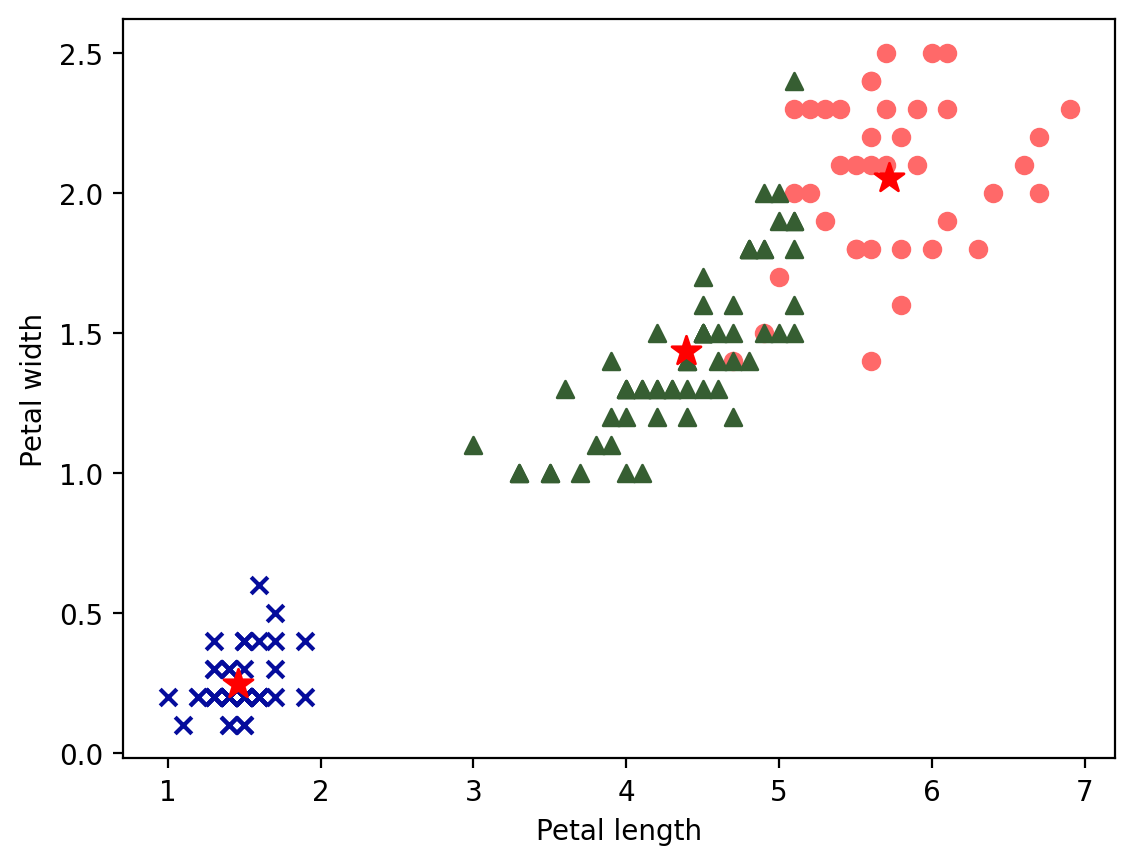

In [15]:
import matplotlib.pyplot as plt

colors = ['#FF6969', '#050C9C', '#365E32']
markers = ['o', 'x', '^']

plt.figure(dpi=200)
for i in range(len(centers)):
    samples = X[labels == i]
    print(markers[i])
    plt.scatter(samples[:, 2], samples[:, 3], marker=markers[i], color=colors[i])
    plt.scatter(centers[i, 2], centers[i, 3], marker='*', color='r', s=120)

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

use original data as comparison

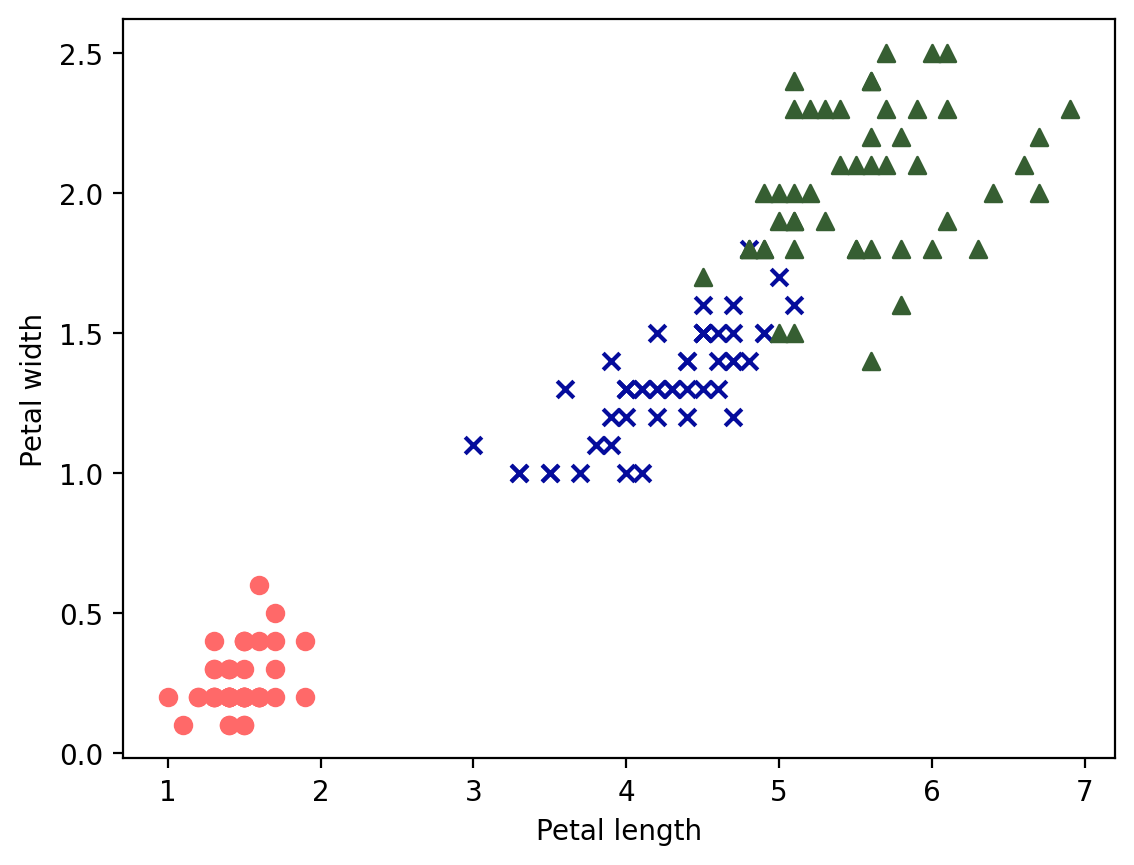

In [16]:
import matplotlib.pyplot as plt

colors = ['#FF6969', '#050C9C', '#365E32']
markers = ['o', 'x', '^']

plt.figure(dpi=200)
for i in range(len(centers)):
    samples = X[y == i]
    plt.scatter(samples[:, 2], samples[:, 3], marker=markers[i], color=colors[i])

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()